In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
df = pd.read_csv("personality.csv")
df.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   usuario    140 non-null    object 
 1   op         140 non-null    float64
 2   co         140 non-null    float64
 3   ex         140 non-null    float64
 4   ag         140 non-null    float64
 5   ne         140 non-null    float64
 6   wordcount  140 non-null    float64
 7   categoria  140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB


In [4]:
df = df.iloc[:,1:]
df

,op,co,ex,ag,ne,wordcount,categoria
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4
...,...,...,...,...,...,...,...
135,35.569389,22.133740,38.904885,31.624351,12.201221,47.5420,7
136,31.960417,15.416979,48.533125,40.096458,11.764583,47.5625,4
137,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2
138,51.537405,26.009695,36.465344,23.008168,7.284962,118.6107,1


In [5]:
df.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [6]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(scale,columns=df.columns)
df_scale.head()

,op,co,ex,ag,ne,wordcount,categoria
0,0.102638,0.485725,0.565391,0.641501,0.383967,0.151175,0.750
1,0.359116,0.303292,0.467902,0.478723,0.406663,0.347735,0.750
2,0.281061,0.141023,0.493696,0.810161,0.340190,0.208518,0.375
3,0.248507,0.180081,0.817966,0.696232,0.174393,0.355544,0.125
4,0.159427,0.282146,0.725415,0.698045,0.273474,0.198168,0.375


In [7]:
pca = PCA()

In [8]:
pca.fit(df_scale)

PCA()

In [9]:
pca_summary_df = pd.DataFrame({"Proporcion de la Varianza" :pca.explained_variance_ratio_, "proporcion acumulada": np.cumsum(pca.explained_variance_ratio_)})

In [10]:
pca_summary_df = pca_summary_df.transpose()

In [11]:
pca_summary_df

,0,1,2,3,4,5,6
Proporcion de la Varianza,0.459838,0.252489,0.104511,0.064297,0.052139,0.038691,0.028035
proporcion acumulada,0.459838,0.712327,0.816838,0.881134,0.933274,0.971965,1.000000


In [12]:
pca_components = pd.DataFrame(pca.components_.transpose(),columns=pca_summary_df.columns,index =df.columns)
pca_components

,0,1,2,3,4,5,6
op,-0.423665,0.161258,0.297915,-0.122392,0.555228,0.183663,-0.590559
co,-0.084508,0.283395,-0.046147,0.273515,-0.313708,-0.723723,-0.461972
ex,0.224236,-0.301010,-0.144342,-0.758990,-0.278475,-0.027230,-0.428860
ag,0.437575,-0.500320,-0.323078,0.399572,0.444152,-0.075088,-0.302095
ne,0.089161,0.173650,-0.136090,0.357410,-0.471680,0.659595,-0.397600
wordcount,-0.205198,0.384498,-0.855356,-0.166670,0.212929,0.032031,0.065398
categoria,0.722189,0.612179,0.183706,-0.137715,0.225096,0.004676,-0.016636


In [13]:
pca = PCA(n_components=2)

In [14]:
principal_components = pca.fit_transform(df_scale)

In [15]:
pca_summary_df = pd.DataFrame({"Proporcion de la Varianza" :pca.explained_variance_ratio_, "proporcion acumulada": np.cumsum(pca.explained_variance_ratio_)})

In [16]:
pca_summary_df

,Proporcion de la Varianza,proporcion acumulada
0,0.459838,0.459838
1,0.252489,0.712327


In [17]:
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca

,PC1,PC2
0,0.522163,0.012059
1,0.297521,0.192021
2,0.246935,-0.334779
3,0.054788,-0.494872
4,0.285618,-0.343622
...,...,...
135,0.535406,-0.000808
136,0.484158,-0.499145
137,-0.561505,-0.044943
138,-0.398081,-0.124593


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

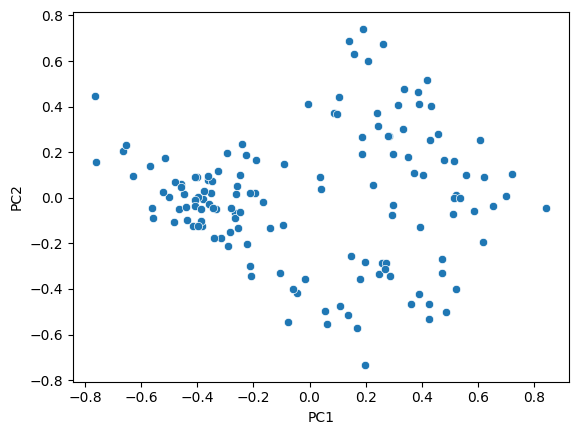

In [18]:
sns.scatterplot(y = 'PC2', x = 'PC1', data = df_pca)

In [19]:
K = range(2,12)
inertias = []

for i in K:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_pca)
    inertias.append(kmeans.inertia_)

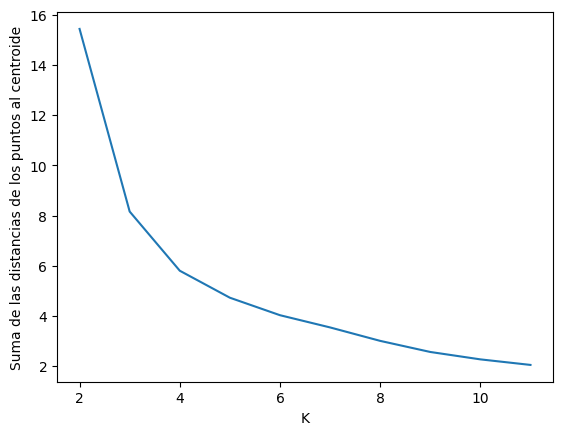

In [20]:
plt.plot(K, inertias)
plt.xlabel('K')
plt.ylabel('Suma de las distancias de los puntos al centroide')
plt.show()

In [21]:
km = KMeans(n_clusters=4) # 4 clusters por el metodo del codo
km.fit_predict(df_pca)

array([1, 0, 3, 3, 3, 1, 1, 3, 0, 0, 2, 2, 2, 2, 0, 2, 3, 0, 2, 3, 3, 2,
       2, 1, 2, 2, 1, 3, 3, 2, 0, 2, 2, 0, 3, 3, 3, 3, 3, 2, 1, 3, 1, 2,
       2, 2, 0, 2, 3, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 1,
       2, 2, 2, 3, 1, 0, 0, 2, 0, 2, 0, 3, 3, 1, 3, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 3, 0, 2, 2, 2, 3, 2, 2, 3, 1, 0, 0,
       0, 1, 1, 1, 0, 2, 0, 2, 3, 1, 0, 3, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 1, 3, 2, 2, 3])

In [22]:
df_pca["Clusters"] = km.labels_

In [23]:
df_pca.head()

,PC1,PC2,Clusters
0,0.522163,0.012059,1
1,0.297521,0.192021,0
2,0.246935,-0.334779,3
3,0.054788,-0.494872,3
4,0.285618,-0.343622,3


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

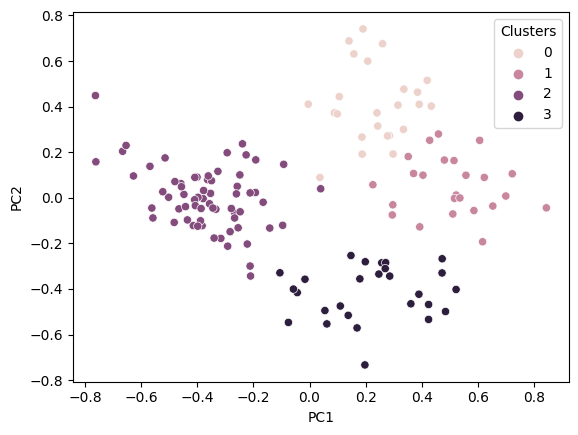

In [24]:
sns.scatterplot(y = 'PC2', x = 'PC1', data = df_pca, hue="Clusters")

In [25]:
df["Clusters"] = km.labels_

In [26]:
df.head()

,op,co,ex,ag,ne,wordcount,categoria,Clusters
0,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,1
1,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,0
2,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,3
3,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,3
4,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,3


In [27]:
df.groupby('Clusters').count()

,op,co,ex,ag,ne,wordcount,categoria
Clusters,,,,,,,
0,24,24,24,24,24,24,24
1,24,24,24,24,24,24,24
2,65,65,65,65,65,65,65
3,27,27,27,27,27,27,27


In [28]:
df_names = pd.read_csv('personality.csv')

In [29]:
df_names[df['Clusters'] == 1]

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
5,alo_oficial,33.531771,16.183958,43.211667,25.786667,11.930417,40.1354,7
6,andresiniesta8,31.851102,13.735591,47.182362,19.594331,6.905591,91.5197,7
23,CasillasWorld,31.215455,17.506364,44.180909,32.870000,9.378182,87.8182,7
26,CFKArgentina,35.943438,22.848281,45.519531,28.021250,6.521172,75.5156,8
40,DidacLee,45.053969,22.041985,48.950992,24.374427,6.090000,30.8244,6
42,edans,42.444615,23.410769,45.780231,24.745615,6.748308,43.5615,6
49,FALCAO,31.891474,14.213368,53.373368,24.296316,4.348316,72.8105,7
51,FernandezAnibal,36.196989,24.505484,42.358817,24.191613,8.664086,48.7849,8
52,fieritacatalano,38.913420,21.571861,46.979524,28.669524,6.160779,46.5541,6


In [30]:
df_names['Clusters'] = km.labels_

In [36]:
df_names[df_names["Clusters"] == 2]

,usuario,op,co,ex,ag,ne,wordcount,categoria,Clusters
10,AngelAlessandra,52.750992,24.706565,41.698855,17.057176,8.279847,97.2901,3,2
11,antoniobanderas,41.328182,20.241212,39.173333,21.070505,7.823535,32.8788,1,2
12,aplusk,54.407727,26.992121,34.104318,18.771818,8.867197,125.3409,1,2
13,AvrilLavigne,47.610076,20.343788,39.439545,21.438409,8.865303,128.8561,2,2
15,BarRefaeli,48.617348,21.165758,43.617955,19.263258,5.176515,58.5833,3,2
...,...,...,...,...,...,...,...,...,...
131,TomCruise,58.380294,14.590784,45.653922,12.822843,4.094706,127.2059,1,2
132,tomhanks,40.345769,27.483615,37.003923,17.285538,11.544615,114.7077,1,2
134,victoriabeckham,57.962308,20.413308,33.373538,17.684000,5.751154,110.0231,3,2
137,xoellopez,71.696129,12.489274,27.571210,19.093548,3.241935,74.3065,2,2


In [38]:
df_names[df_names["Clusters"] == 3].describe()

,op,co,ex,ag,ne,wordcount,categoria,Clusters
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.0
mean,36.936767,17.668828,48.724101,33.012045,7.107270,68.034756,3.148148,3.0
std,4.768090,3.955044,5.068129,4.336068,2.830464,24.279231,1.350319,0.0
min,30.020465,7.852756,38.999896,23.930625,2.073937,26.687000,1.000000,3.0
25%,33.007744,15.397220,45.358317,29.997219,5.302637,49.915600,2.000000,3.0
50%,36.272348,17.846526,48.530806,33.395938,7.305968,62.426400,4.000000,3.0
75%,40.225348,20.034492,52.142418,36.082507,8.922792,78.219050,4.000000,3.0
max,45.813043,25.933386,59.824844,40.583162,12.412500,122.772700,5.000000,3.0


In [39]:
df_names[df_names["Clusters"] == 0].describe()

,op,co,ex,ag,ne,wordcount,categoria,Clusters
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,42.415133,26.877651,38.424693,20.004802,11.221368,130.013996,7.291667,0.0
std,4.694177,5.309107,5.556798,4.750353,3.526839,47.221469,0.999094,0.0
min,34.235923,19.606051,27.149545,13.231220,6.625736,41.683700,5.000000,0.0
25%,39.436287,23.976090,34.519191,16.279777,9.356074,92.566625,7.000000,0.0
50%,41.658428,26.272385,38.398460,19.955047,10.709065,123.053200,7.000000,0.0
75%,45.288786,28.894145,41.580745,21.947256,11.709580,174.784700,8.000000,0.0
max,52.895725,41.741463,52.722403,32.291591,23.978462,206.531900,9.000000,0.0


In [40]:
df_names[df_names["Clusters"] == 2].describe()

,op,co,ex,ag,ne,wordcount,categoria,Clusters
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,50.894047,24.240389,37.147584,17.824713,7.215735,112.740703,1.969231,2.0
std,6.602434,5.582368,6.141916,4.209999,2.379567,41.637731,0.934900,0.0
min,34.186667,12.489274,18.693542,9.305985,1.030213,5.020800,1.000000,2.0
25%,47.610076,21.441684,33.349333,15.602331,5.658731,93.184600,1.000000,2.0
50%,49.470000,23.370992,37.019847,17.494624,7.284962,111.800000,2.000000,2.0
75%,54.407727,26.924846,41.698855,20.816439,8.865303,135.757800,2.000000,2.0
max,71.696129,49.637863,49.822326,30.568258,11.544615,217.183200,4.000000,2.0


In [41]:
df_names[df_names["Clusters"] == 1].describe()

,op,co,ex,ag,ne,wordcount,categoria,Clusters
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0
mean,37.278072,21.627154,43.945149,28.272797,7.907575,63.947821,7.458333,1.0
std,4.289648,4.066527,4.417522,5.431414,2.249776,20.447783,0.977093,0.0
min,31.215455,13.735591,30.295484,19.594331,4.348316,30.824400,6.000000,1.0
25%,34.106407,18.989649,42.252012,24.354899,6.431074,47.295025,7.000000,1.0
50%,36.804354,22.112260,43.666953,26.861389,7.212615,65.917850,7.000000,1.0
75%,39.533021,24.576452,46.080054,30.827210,9.394807,78.790775,8.000000,1.0
max,45.053969,28.855308,53.373368,39.664375,12.314729,103.710500,9.000000,1.0


In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
linkage_data = linkage(df_pca, method="centroid", metric="euclidean")

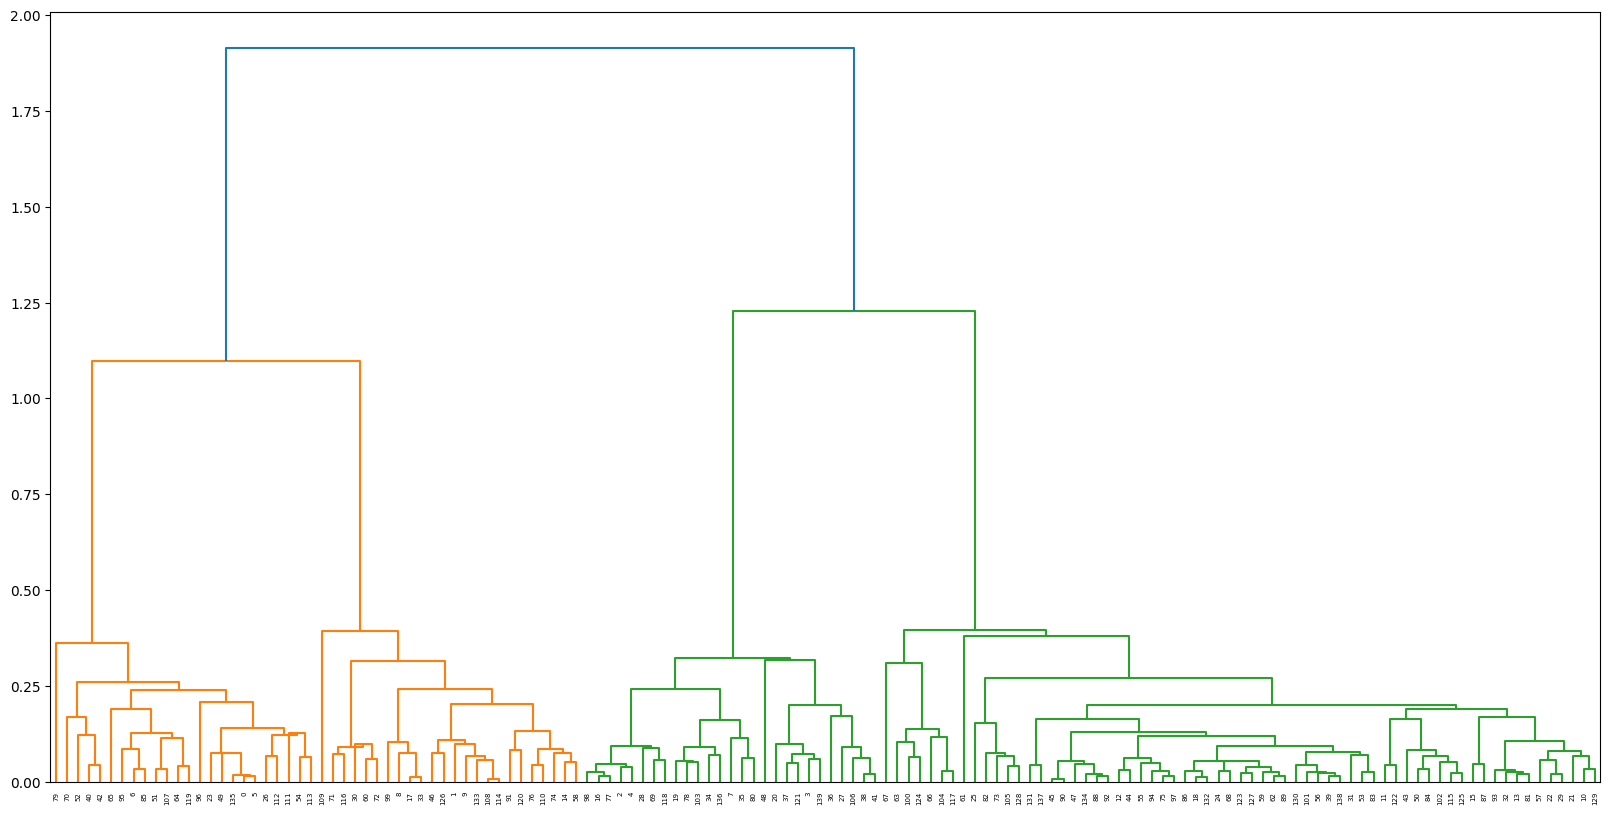

In [34]:
plt.figure(figsize=(20,10))
dendrogram(linkage_data)
plt.show()

## 1. ¿Por qué es necesario normalizar los datos?

Es necesario normalizar los datos porque así todos se encuentran en la misma escala. En este ejemplo es importante hacerlo ya que la variable `wordcount` maneja números más grandes que las demás variables, y para que se puedan utilizar en el mismo modelo deben estar todas en una escala similar. De esta forma se evita que haya un sesgo dándole más peso a las variables con valores más altos, como `wordcount` en este caso. 

## 2. ¿Cuántos componentes se usaron y que variables tienen mayor importancia?

Se usaron 2 components. Las variables que tuvieron más importancia para ambos componentes fueron `categoria` y `ag`.

## 3. ¿Qué información da la gráfica "Elbow plot"?

La gráfica de elbow plot nos ayuda a determinar el número óptimo de clusters para la clasificación.

## 4. ¿Crees que los resultados serían diferentes si descartas variables?

Sí. Si descartamos variables, los componentes serían afectados en una proporción diferente por cada variable restante y por lo tanto los resultados serían diferentes.

## 5. Interpreta por lo menos 2 clusters explicando similitudes o diferencias de personalidad.

El cluster número 1 son predominantemente deportistas y el cluster 2 predominantemente actores y/o cantantes. Esto tiene sentido, ya que la variable de mayor importancia en los dos componentes que se tomaron en cuenta es `categoria`, la cual indica la actividad laboral del usuario. Se puede observar esta diferencia al obtener las estadísticas de cada cluster. La media de la variable `categoria` para el cluster 1 es 7.29, mientras que para el cluster 2 es de de 1.96. En la información sobre la base de datos podemos observar que los valores de 1, 2, y 7 corresponden a Actores, Cantantes, y Deportistas respectivamente. 